In [1]:
import numpy as np
import torch
import pandas as pd
from tqdm import tqdm
import pickle
import copy

import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import Descriptors, rdmolops

In [2]:
gat_hyperparams = np.load('data/opts/sweep_gat.npz')
print(list(gat_hyperparams.keys()))

['hc_list', 'nl_list', 'do_list', 'act_list', 'loss_list', 'epoch_list']


In [3]:
best_idx = np.argmin(gat_hyperparams['loss_list'])

In [4]:
best_hc = gat_hyperparams['hc_list'][best_idx]
best_nl = gat_hyperparams['nl_list'][best_idx]
best_do = gat_hyperparams['do_list'][best_idx]
best_act = gat_hyperparams['act_list'][best_idx]

In [5]:
best_hc, best_nl, best_do, best_act

(20.0, 2.0, 0.1, 'relu')

In [15]:
np.where(gat_hyperparams['hc_list']==5)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [17]:
gat_hyperparams['nl_list']

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 10.,
       10., 10., 10., 10., 10., 10., 10., 10., 10.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  8

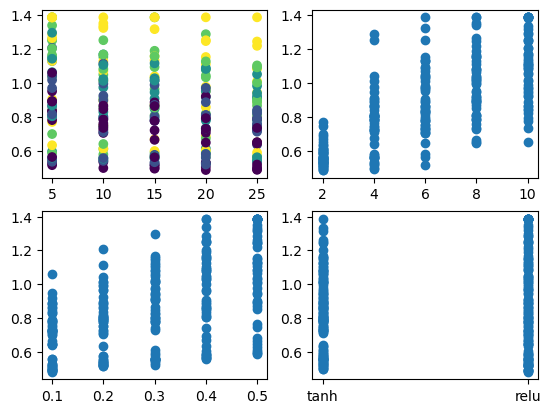

In [12]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(gat_hyperparams['hc_list'], gat_hyperparams['loss_list'], c=gat_hyperparams['do_list'])
# fig.colorbar(gat_hyperparams['nl_list'])
axs[0,1].scatter(gat_hyperparams['nl_list'], gat_hyperparams['loss_list'])
axs[1,0].scatter(gat_hyperparams['do_list'], gat_hyperparams['loss_list'])
axs[1,1].scatter(gat_hyperparams['act_list'], gat_hyperparams['loss_list'])